# Project Title : Loan Eligibility Prediction using Machine Learning

## Project Overview
This project aims to predict the eligibility of loan applicants based on their personal, financial, and employment details. The model helps banks and financial institutions automate and streamline the loan approval process by making data-driven decisions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [2]:
loan = pd.read_csv('/content/loan_approval_dataset.csv')
loan.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1675,1676,5,Not Graduate,No,7900000,29900000,6,568,5800000,13900000,15900000,8700000,Approved
4135,4136,4,Not Graduate,No,6600000,25400000,12,622,9200000,3500000,19900000,7500000,Approved
2889,2890,0,Not Graduate,Yes,1800000,6500000,12,728,3500000,0,6100000,1900000,Approved
634,635,1,Not Graduate,No,8400000,29900000,16,476,16100000,2400000,32700000,7500000,Rejected
2534,2535,3,Not Graduate,No,800000,3000000,14,576,1200000,1300000,2600000,400000,Approved


In [3]:
loan.shape

(4269, 13)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
loan.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
loan.rename(columns=lambda x: x.lower().strip(), inplace=True)
print(loan.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [7]:
# Checking the datatypes of the columns
loan.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


## Hanidling with the missing values

In [8]:
# In the loan dataset their is no Null values
# If in case is their any null values is their for Categorial values change with Mode/ffill/bfill and for Numerical value change with mean/median as per the data requirements
loan.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


# Exploratory Data Analysis

## Univariate Analysis

<Axes: xlabel='loan_status'>

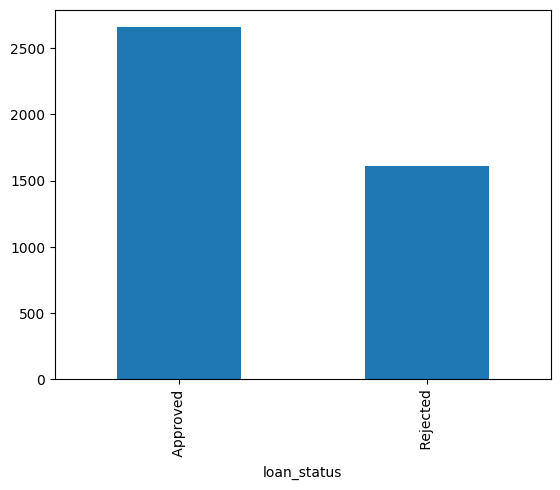

In [9]:
loan['loan_status'].value_counts().plot.bar()

<Axes: title={'center': 'no_of_dependents'}, ylabel='proportion'>

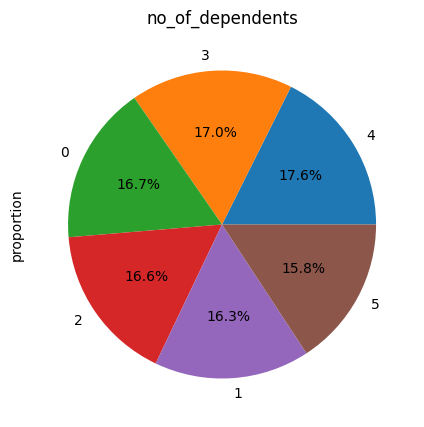

In [10]:
loan['no_of_dependents'].value_counts(normalize=True).plot.pie(title= 'no_of_dependents',autopct='%1.1f%%',figsize=(8, 5))

## Bivariate Analysis

In [11]:
education=pd.crosstab(loan['education'],loan['loan_status'])
education

loan_status,Approved,Rejected
education,,
Graduate,1339,805
Not Graduate,1317,808


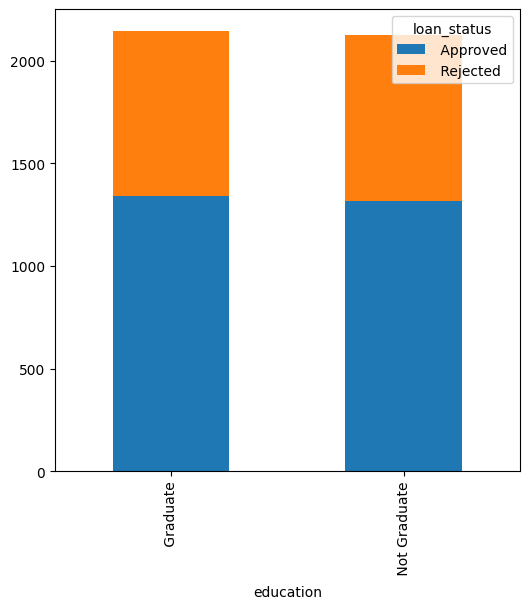

In [12]:
education.plot(kind="bar", stacked=True, figsize=(6,6))
plt.show()

In [13]:
self_employed=pd.crosstab(loan['self_employed'],loan['loan_status'])
self_employed

loan_status,Approved,Rejected
self_employed,,
No,1318,801
Yes,1338,812


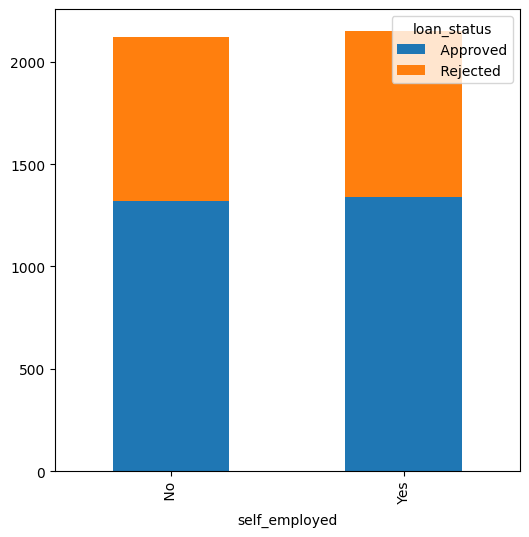

In [14]:
self_employed.plot(kind="bar", stacked=True, figsize=(6,6))
plt.show()

In [15]:
Dependents=pd.crosstab(loan['no_of_dependents'],loan['loan_status'])
Dependents

loan_status,Approved,Rejected
no_of_dependents,,
0,457,255
1,430,267
2,441,267
3,457,270
4,465,287
5,406,267


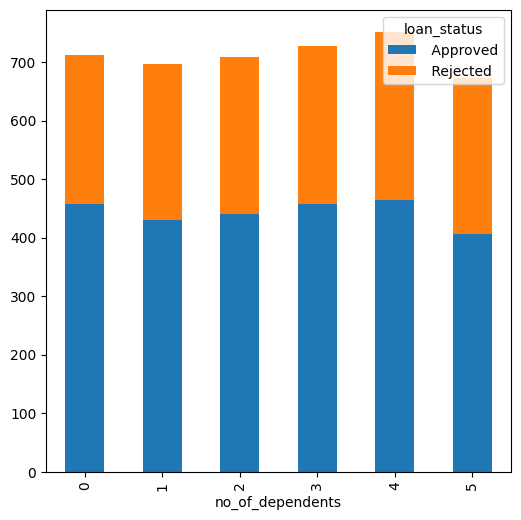

In [16]:
Dependents.plot(kind="bar", stacked=True, figsize=(6,6))
plt.show()

## Distribution of the variables

<Axes: >

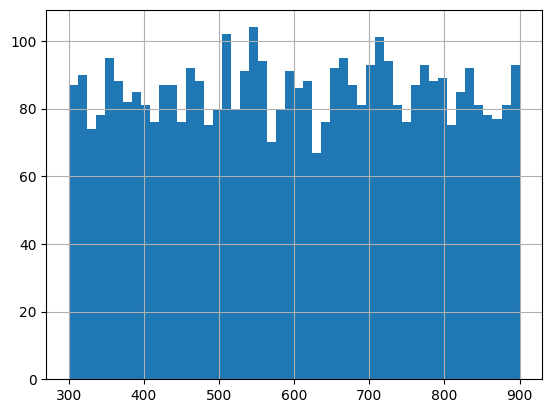

In [17]:
loan['cibil_score'].hist(bins=50)

## Checking the outliers for the numerical columns

<Axes: >

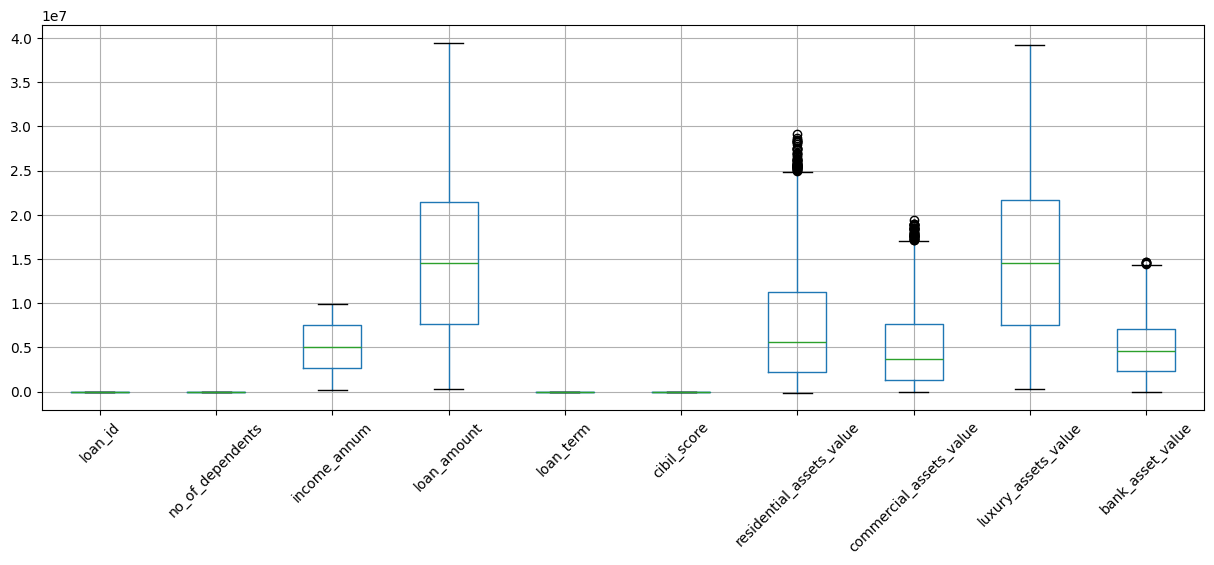

In [18]:

numerical_cols = loan.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 5))
loan[numerical_cols].boxplot(rot=45, grid=True)


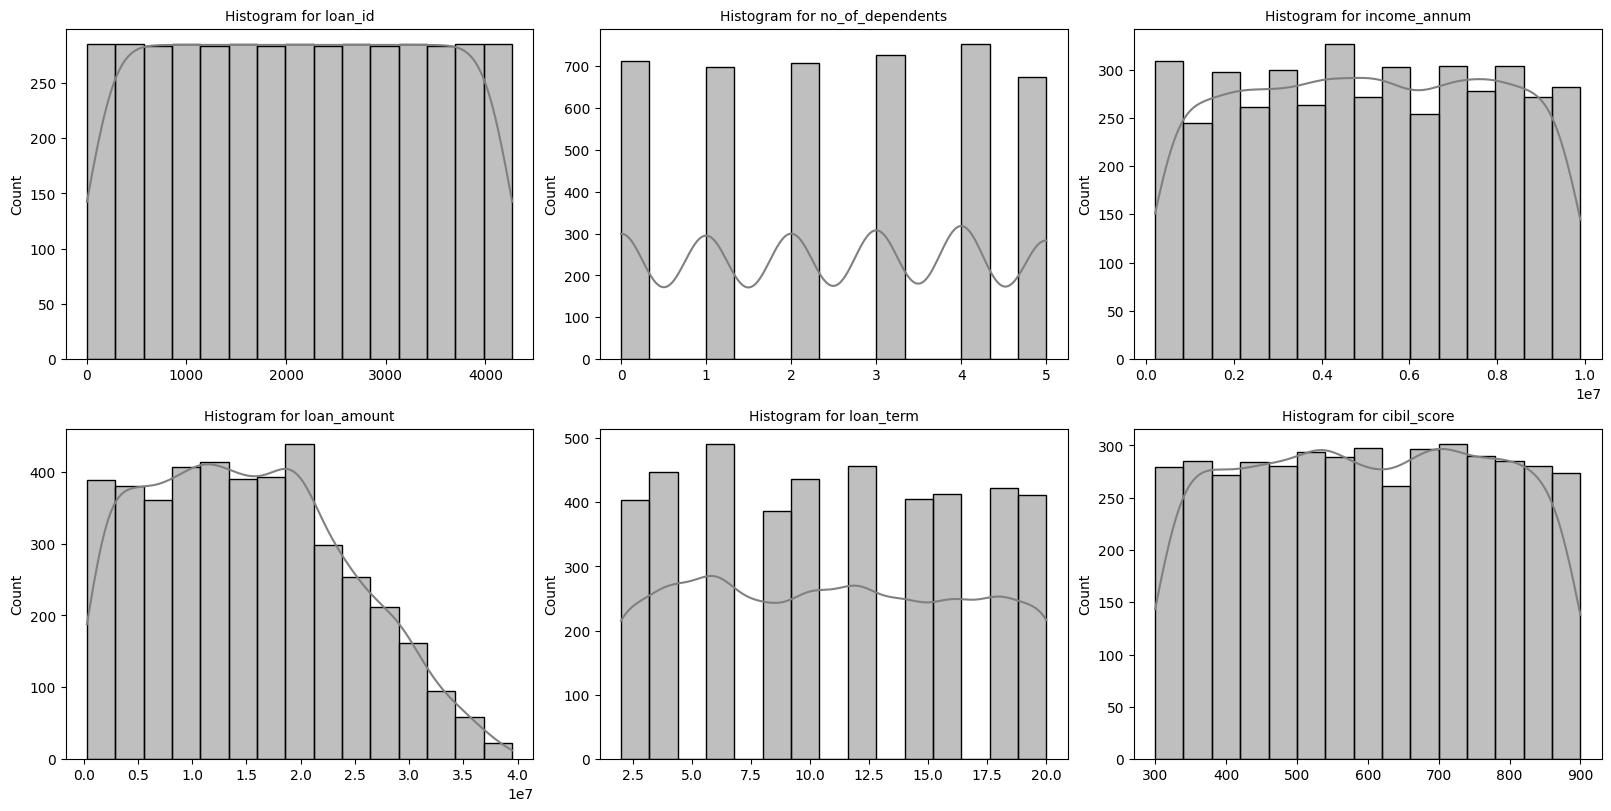

In [19]:
# Checking the outliers for the numerical columns
numerical_cols = loan.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(2, 3, figsize=(16, 8), constrained_layout=True)  # 2 rows, 3 columns
for ax, column in zip(axes.flat, numerical_cols):
    sns.histplot(data=loan, x=column, ax=ax, kde=True, color='gray', bins=15)  # Add KDE if desired
    ax.set_title(f'Histogram for {column}', fontsize=10)
    ax.set_xlabel('')

## Label Encoding Processing

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Convert Categorical Variables to Numerical


In [21]:
lc = LabelEncoder()
for col in ['education','self_employed','loan_status']:
    loan[col] = lc.fit_transform(loan[col])


### Standarizing the Numerical columns

In [22]:
scaler = StandardScaler()
for col in ['no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']:
   loan[[col]] = scaler.fit_transform(loan[[col]])


In [23]:
# Stastical Summary
loan.describe()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2135.000000,4.993273e-17,0.497775,0.503631,1.681069e-16,7.323467e-17,-9.736882e-17,2.629790e-16,3.828176e-17,-1.664424e-18,-5.908706e-17,4.993273e-17,0.377840
std,1232.498479,1.000117e+00,0.500054,0.500045,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,0.484904
min,1.000000,-1.473548e+00,0.000000,0.000000,-1.731375e+00,-1.640450e+00,-1.559151e+00,-1.739665e+00,-1.164503e+00,-1.133237e+00,-1.628783e+00,-1.531382e+00,0.000000
25%,1068.000000,-8.838247e-01,0.000000,0.000000,-8.405896e-01,-8.220748e-01,-8.584443e-01,-8.522468e-01,-8.108132e-01,-8.370048e-01,-8.378082e-01,-8.236472e-01,0.000000
50%,2135.000000,2.956212e-01,0.000000,1.000000,1.456473e-02,-7.005410e-02,-1.577371e-01,3.709143e-04,-2.879675e-01,-2.901149e-01,-5.781874e-02,-1.159123e-01,0.000000
75%,3202.000000,8.853442e-01,1.000000,1.000000,8.697190e-01,7.040849e-01,8.933237e-01,8.587888e-01,5.885679e-01,5.985812e-01,7.221707e-01,6.533647e-01,1.000000
max,4269.000000,1.475067e+00,1.000000,1.000000,1.724873e+00,2.694728e+00,1.594031e+00,1.740407e+00,3.325819e+00,3.287456e+00,2.644680e+00,2.991967e+00,1.000000


### Train-Test Spliting the Data

In [24]:
x = loan.iloc[:,1:12]
x.shape

(4269, 11)

In [25]:
y = loan[['loan_status']]
y.shape

(4269, 1)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 42)

## Model Selection & Implementation

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [29]:
y_pred = lr.predict(x_test)
Accuraacy_score = accuracy_score(y_test, y_pred)
Train = lr.score(x_train,y_train)*100
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix:\n',cm)
report = classification_report(y_test, y_pred)
print('classification_report:\n',report)
print('Training_accuracy: ', Train)
print('Testing_accuracy: ',Accuraacy_score)


confusion_matrix:
 [[631  47]
 [ 54 336]]
classification_report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       678
           1       0.88      0.86      0.87       390

    accuracy                           0.91      1068
   macro avg       0.90      0.90      0.90      1068
weighted avg       0.91      0.91      0.91      1068

Training_accuracy:  92.1899406435489
Testing_accuracy:  0.9054307116104869


## Decision tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dt.predict(x_test)
Accuraacy_score = accuracy_score(y_test, y_pred)
Train = dt.score(x_train,y_train)*100
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix:\n',cm)
report = classification_report(y_test, y_pred)
print('classification_report:\n',report)
print('Training_accuracy: ', Train)
print('Testing_accuracy: ',Accuraacy_score)

confusion_matrix:
 [[670   8]
 [ 13 377]]
classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       678
           1       0.98      0.97      0.97       390

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068

Training_accuracy:  100.0
Testing_accuracy:  0.9803370786516854


## KNN Model

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [33]:
y_pred = knc.predict(x_test)
Accuraacy_score = accuracy_score(y_test, y_pred)
Train = knc.score(x_train,y_train)*100
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix:\n',cm)
report = classification_report(y_test, y_pred)
print('classification_report:\n',report)
print('Training_accuracy: ', Train)
print('Testing_accuracy: ',Accuraacy_score)

confusion_matrix:
 [[614  64]
 [ 47 343]]
classification_report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       678
           1       0.84      0.88      0.86       390

    accuracy                           0.90      1068
   macro avg       0.89      0.89      0.89      1068
weighted avg       0.90      0.90      0.90      1068

Training_accuracy:  95.12652296157451
Testing_accuracy:  0.8960674157303371


## Naive Bayes Model

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [35]:
y_pred = gnb.predict(x_test)
Accuraacy_score = accuracy_score(y_test, y_pred)
Train = gnb.score(x_train,y_train)*100
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix:\n',cm)
report = classification_report(y_test, y_pred)
print('classification_report:\n',report)
print('Training_accuracy: ', Train)
print('Testing_accuracy: ',Accuraacy_score)

confusion_matrix:
 [[634  44]
 [ 26 364]]
classification_report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       678
           1       0.89      0.93      0.91       390

    accuracy                           0.93      1068
   macro avg       0.93      0.93      0.93      1068
weighted avg       0.94      0.93      0.93      1068

Training_accuracy:  93.6269915651359
Testing_accuracy:  0.9344569288389513


## Support vector machine Model

In [36]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [37]:
y_pred = svc.predict(x_test)
Accuraacy_score = accuracy_score(y_test, y_pred)
Train = svc.score(x_train,y_train)*100
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix:\n',cm)
report = classification_report(y_test, y_pred)
print('classification_report:\n',report)
print('Training_accuracy: ', Train)
print('Testing_accuracy: ',Accuraacy_score)

confusion_matrix:
 [[639  39]
 [ 29 361]]
classification_report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       678
           1       0.90      0.93      0.91       390

    accuracy                           0.94      1068
   macro avg       0.93      0.93      0.93      1068
weighted avg       0.94      0.94      0.94      1068

Training_accuracy:  95.68884723523898
Testing_accuracy:  0.9363295880149812


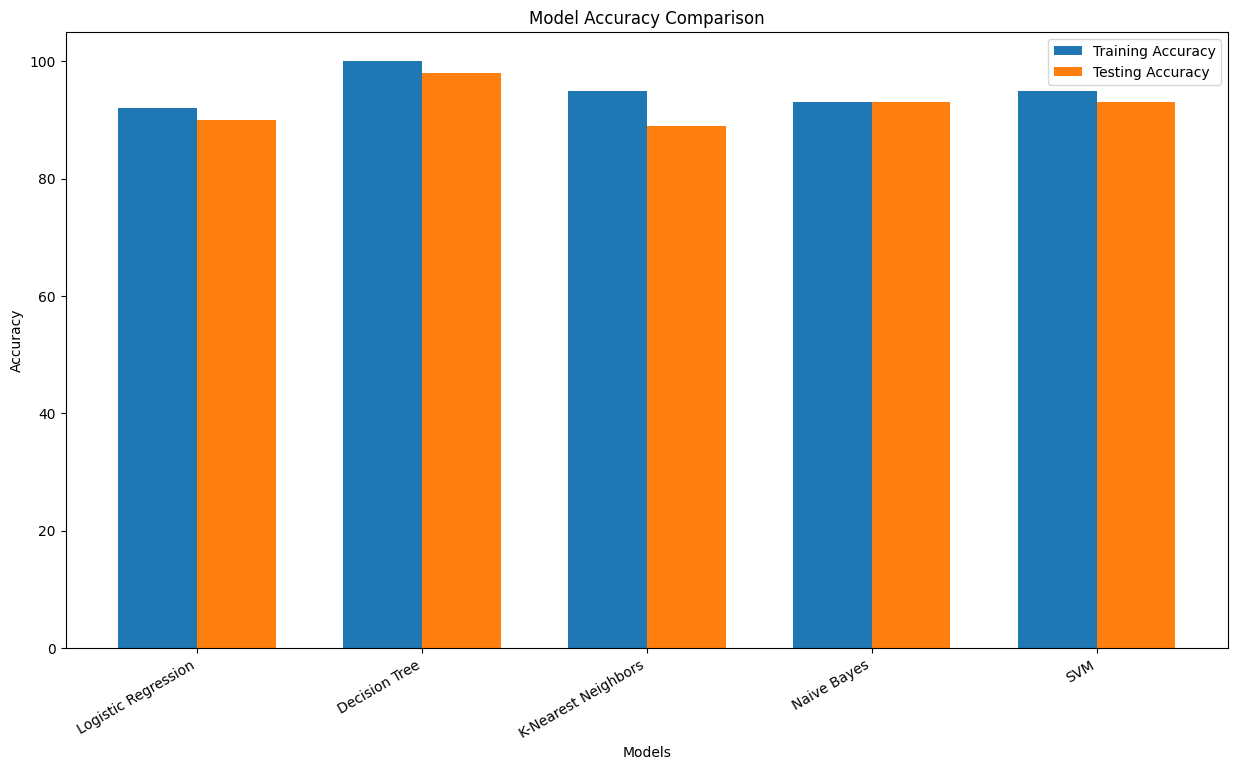

In [40]:
models = [ 'Logistic Regression','Decision Tree','K-Nearest Neighbors','Naive Bayes','SVM']
train_accuracy = [92, 100, 95, 93, 95]
test_accuracy = [90, 98, 89, 93, 93]
x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots(figsize=(15,8))

# Plot bars
bars1 = ax.bar(x - width/2, train_accuracy, width, label='Training Accuracy', color='tab:blue')
bars2 = ax.bar(x + width/2, test_accuracy, width, label='Testing Accuracy', color='tab:orange')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30, ha="right")
ax.legend()
plt.show()